<a href="https://colab.research.google.com/github/loureenvalyne/R_projects/blob/main/nursery_survey_data_Analyis_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NURSERY SURVEY DATA - DATA ANALYSIS
Tree nurseries are integral to afforestation and reforestation initiatives as they provide the seedlings needed for successful restoration. This analysis focuses on survey data collected from various tree nurseries to assess their capacity to produce sufficient seedlings for ecological restoration projects.

The primary objective of this analysis is to understand the production capacity of nurseries across different counties. By examining variables such as the types of seedlings produced, nursery capacity, and other key indicators, we aim to identify regional strengths and gaps in the nurseries’ ability to meet restoration demands. Through the use of pivot tables, charts, and summary statistics, this analysis provides insights into the resources and capabilities available at each nursery and highlights areas for potential support or development.

## Installing packages for Analysis

In [2]:
install.packages("tidyverse")
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Importing the Data-set

In [3]:
nursery_survey_data <- read_csv("/kaggle/input/nursery-survey-data/nursery_survey_data.csv")

New names:
• `questionnaire_number` -> `questionnaire_number...3`
• `questionnaire_number` -> `questionnaire_number...75`
Rows: 412 Columns: 109
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (92): interview_date, recipient_consent, enumeratorname, country, ADM1, ...
dbl (16): questionnaire_number...3, accuracy, elevation, phone_number, nurse...
lgl  (1): competitors_other

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Exploring the Data-set

In [4]:
# checking the outlook of the data, the first 10 rows
head(nursery_survey_data, 10)

interview_date,recipient_consent,questionnaire_number...3,enumeratorname,country,ADM1,ADM2,ADM3,nursery_location,accuracy,⋯,plans_to_sclae_up,scale_up_constraints,competitors_list,competitors_other,competitors_competitive_edge,competitive_edge_others,training_areas_required,training_areas_required_other,other_information,nursery_enterprise_info
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA
17-07-24,yes,1,Joshua Musau,Kenya,Nakuru,Gilgil,Gilgil,-0.4625 36.2817,4.9,⋯,yes,lack_of_germplasm limited_information Lack_of_room_for_expansion,Private/individuals,NA,established_network experienced/skilled_workforce others,They are along the highway and thus very visible unlike us 200m inside.,risk_assessment Record_keeping Sales_and_marketing Business_plan_development,NA,NA,NA


In [5]:
# checking the attributes of the data
colnames(nursery_survey_data)

[1] "interview_date"                           
  [2] "recipient_consent"                        
  [3] "questionnaire_number...3"                 
  [4] "enumeratorname"                           
  [5] "country"                                  
  [6] "ADM1"                                     
  [7] "ADM2"                                     
  [8] "ADM3"                                     
  [9] "nursery_location"                         
 [10] "accuracy"                                 
 [11] "elevation"                                
 [12] "organization"                             
 [13] "respondent_name"                          
 [14] "phone_number"                             
 [15] "gender"                                   
 [16] "respondent_status"                        
 [17] "respondent_status_other"                  
 [18] "nursery_experience_years"                 
 [19] "nursery_experience_months"                
 [20] "nursery_type"                             
 [21] "nursery_type_other"                       
 [22] "nursery_purpose"                          
 [23] "nursery_purpose_others_specify"           
 [24] "nursery_registration_status"              
 [25] "registering_org"                          
 [26] "registering_org_others_specify"           
 [27] "nursery_land_ownership"                   
 [28] "nursery_land_ownership_leased"            
 [29] "nursery_land_ownership_other"             
 [30] "years"                                    
 [31] "months"                                   
 [32] "nursery_production_category"              
 [33] "distance_to_paved_road"                   
 [34] "distance_to_water"                        
 [35] "nursery_total_employees"                  
 [36] "males_total"                              
 [37] "females_total"                            
 [38] "Seed_Collection"                          
 [39] "Seed_Collection_Challenge_description"    
 [40] "Nursery_Techniques"                       
 [41] "Nursery_Techniques_Challenges_Description"
 [42] "Seed_Sales"                               
 [43] "Seed_Sales_Challenges_description"        
 [44] "Other_Challenges"                         
 [45] "Challenge"                                
 [46] "Description"                              
 [47] "Nursery_Infrastructure_Appropriateness"   
 [48] "Appropriateness_Justification"            
 [49] "Nursery_Materials_Satisfaction"           
 [50] "Satisfaction_Justification"               
 [51] "Nursery_Records_Present"                  
 [52] "Nursery_Records"                          
 [53] "Nursery_Records_Other"                    
 [54] "Indigenous"                               
 [55] "Exotic"                                   
 [56] "species_name"                             
 [57] "Common name"                              
 [58] "number_of_seedlings"                      
 [59] "media_type"                               
 [60] "method_of_propagation"                    
 [61] "propagation_method_others"                
 [62] "own_collection_source"                    
 [63] "seller_name"                              
 [64] "seller_contact"                           
 [65] "training_attended"                        
 [66] "year"                                     
 [67] "days"                                     
 [68] "organizer"                                
 [69] "members_attended"                         
 [70] "males_attended"                           
 [71] "females_attended"                         
 [72] "training_theme"                           
 [73] "training_helpful"                         
 [74] "applying_lessons"                         
 [75] "questionnaire_number...75"                
 [76] "National_Policies"                        
 [77] "Challenges_Germplasm_Sourcing"            
 [78] "Challenges_Solutions"                     
 [79] "Unable_To_Produce_Species"                
 [80] "species_name_unable"                      
 [

In [6]:
#checking for missing values and NA's
summary(nursery_survey_data)

 interview_date     recipient_consent  questionnaire_number...3
 Length:412         Length:412         Min.   : 1.00           
 Class :character   Class :character   1st Qu.: 6.00           
 Mode  :character   Mode  :character   Median :15.00           
                                       Mean   :16.68           
                                       3rd Qu.:28.00           
                                       Max.   :40.00           
                                                               
 enumeratorname       country              ADM1               ADM2          
 Length:412         Length:412         Length:412         Length:412        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                          

# Pivot Table for Organization, Respondent Status, and County

We will create a pivot table that summarizes the counts of respondent status (owner/employee) categorized by county (ADM1) and organization.

In [7]:
pivot_table_status <- nursery_survey_data %>%
  group_by(organization,ADM1,respondent_status) %>%
  summarise(
    count = n_distinct(respondent_name, na.rm = TRUE),  # Count unique respondents
    .groups = "drop"
  ) %>%
  pivot_wider(
    names_from = respondent_status,
    values_from = count,
    values_fill = list(count = 0)  # Fill missing values with 0
  )

# View the pivot table
View(pivot_table_status)

organization,ADM1,group_official,employee,owner,casual,other
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
Achievers Muunyiini tree nursery (Ahadi achievers),Makueni,1,0,0,0,0
Achievers Utuneni,Makueni,1,0,0,0,0
CFA Kirima Muruai tree nursery,Nyandarua,1,0,0,0,0
"Community Organization for Positive Impact, Care and Development (COPICAD)",Nyandarua,0,1,0,0,0
"Eden reforestation projects, Matathia tree nursery",Kiambu,0,1,0,0,0
Farmlife Health Services,Nakuru,0,1,0,0,0
Groots Kenya,Laikipia,0,1,0,0,0
Grow-Tech Nurseries,Nakuru,0,0,1,0,0
Jikazze tree Nursery,Nyandarua,1,0,0,0,0


### Creating a Unique Identifier for Nurseries

In [8]:
nursery_survey_data <- nursery_survey_data %>%
  mutate(nursery_id = dense_rank(respondent_name))


# RESPONDENTS ANALYSIS
## Total number of respondents

In [9]:
pivot_total_respondents <- nursery_survey_data %>%
  group_by(ADM1) %>%  # Group by county (ADM1)
  summarise(
    total_respondents = n_distinct(respondent_name, na.rm = TRUE),  # Count unique respondents
    .groups = "drop"
  )

# Add a 'Total' row that sums the 'total_respondents' column
pivot_total_respondents <- pivot_total_respondents %>%
  add_row(ADM1 = "Total", total_respondents = sum(pivot_total_respondents$total_respondents))

# View the resulting pivot table with the 'Total' row
View(pivot_total_respondents)

ADM1,total_respondents
<chr>,<int>
Baringo,3
Elgeyo Marakwet,3
Kajiado,1
Kiambu,3
Laikipia,2
Makueni,5
Meru,1
Nakuru,10
Narok,2


## Getting the Mean for the Gender in The Number of Respondents

In [10]:
gender_stats_per_county <- nursery_survey_data %>%
  group_by(ADM1) %>%
  summarise(
    count_male = n_distinct(respondent_name[gender == "male"], na.rm = TRUE),   # Unique count of males
    count_female = n_distinct(respondent_name[gender == "female"], na.rm = TRUE), # Unique count of females
    total_count = count_male + count_female,                                  # Total unique count
    mean_male = round((count_male / total_count) * 100, 2),                   # Mean percentage of males
    mean_female = round((count_female / total_count) * 100, 2),               # Mean percentage of females
    .groups = 'drop'
  )

# View the result
View(gender_stats_per_county)

ADM1,count_male,count_female,total_count,mean_male,mean_female
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Baringo,2,1,3,66.67,33.33
Elgeyo Marakwet,3,0,3,100.00,0.00
Kajiado,1,0,1,100.00,0.00
Kiambu,2,1,3,66.67,33.33
Laikipia,2,0,2,100.00,0.00
Makueni,4,1,5,80.00,20.00
Meru,0,1,1,0.00,100.00
Nakuru,6,4,10,60.00,40.00
Narok,1,1,2,50.00,50.00


## Nursery Experience in Years for each respondent

In [11]:
# Function to calculate the mode of a vector
get_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

# Create the pivot table and get the mode of years of experience per respondent
pivot_table_experience <- nursery_survey_data %>%
  select(respondent_name, ADM1, respondent_status, nursery_experience_years) %>%
  group_by(respondent_name, ADM1,respondent_status) %>%
  summarise(
    total_nursery_experience_years = get_mode(nursery_experience_years),  # Get the mode of experience years
    .groups = 'drop'
  )

# View the result
View(pivot_table_experience)

respondent_name,ADM1,respondent_status,total_nursery_experience_years
<chr>,<chr>,<chr>,<dbl>
Ann Mbondo,Makueni,owner,20
Antony kioko,Makueni,group_official,4
Bernard,Elgeyo Marakwet,group_official,2
Christopher Muruthi,Nakuru,group_official,11
Daniel Mathenge,Nyandarua,group_official,18
Dennis Njung'e,Laikipia,employee,0
Donald Kiptoo Kipchumba,Baringo,group_official,12
Dorothy Naitore,Meru,group_official,15
Edwin Kimutai,Elgeyo Marakwet,group_official,6


# NURSERY ANALYSIS
## Summarizing the Nursery Capacity by County named as ADM1
To understand the capacity by county we group and summarize the data by County. This will give us insights into total and average seedling capacity in each county.To analyze the total and average seedling production capacity by county, we use group_by() and summarize() functions. Assume number_of_seedlings represents the capacity of each nursery.

In [12]:
# Convert `number_of_seedlings` to numeric, handling any non-numeric values as NA
nursery_survey_data$number_of_seedlings <- as.numeric(nursery_survey_data$number_of_seedlings)

county_summary <- nursery_survey_data %>%
  group_by(ADM1) %>%
  summarize(
    total_seedlings = sum(number_of_seedlings, na.rm = TRUE),
    average_seedlings = mean(number_of_seedlings, na.rm = TRUE),
    unique_nurseries_count_per_county = n_distinct(nursery_id)  # Count unique nurseries
  )

# View summary
View(county_summary)

Warning message:
“NAs introduced by coercion”


ADM1,total_seedlings,average_seedlings,unique_nurseries_count_per_county
<chr>,<dbl>,<dbl>,<int>
Baringo,4725,315.0000,3
Elgeyo Marakwet,2670,205.3846,3
Kajiado,0,NaN,1
Kiambu,5112,284.0000,3
Laikipia,200,200.0000,2
Makueni,3527,352.7000,5
Meru,1070,356.6667,1
Nakuru,5100,364.2857,10
Narok,2020,336.6667,2


## Analyzing the nursery types and nursery purpose in each county
## Nursery Type Per County

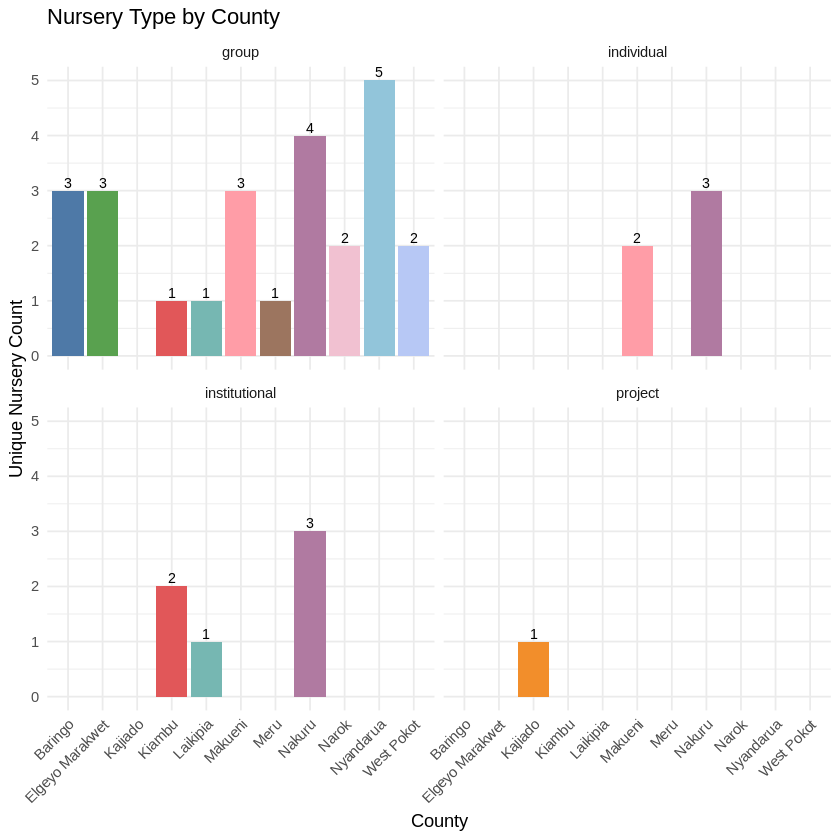

In [13]:
pivot_table_nursery <- nursery_survey_data %>%
  group_by(ADM1, nursery_type) %>%
  summarize(count = n_distinct(nursery_id), .groups = "drop")  # Count unique nurseries

custom_colors <- c(
  "#4E79A7", "#59A14F", "#F28E2B", "#E15759", "#76B7B2",
  "#FF9DA7", "#9C755F", "#B07AA1", "#F1C1D1", "#92C5DA",
  "#B7C8F5"
)

ggplot(pivot_table_nursery, aes(x = ADM1, y = count, fill = ADM1)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~nursery_type) +  # Create separate plots for each nursery type
  scale_fill_manual(values = custom_colors) +  # Manually specify colors
  labs(
    title = "Nursery Type by County",
    x = "County",
    y = "Unique Nursery Count",  # Updated y-axis label
    fill = "County"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"  # Remove the legend
  ) +
  # Add count labels on top of bars
  geom_text(aes(label = count),
            vjust = -0.3,  # Adjust vertical position of the labels
            position = position_dodge(width = 0.9),  # Align text with bars
            size = 3)  # Adjust text size

## Count of Unique Nurseris per County

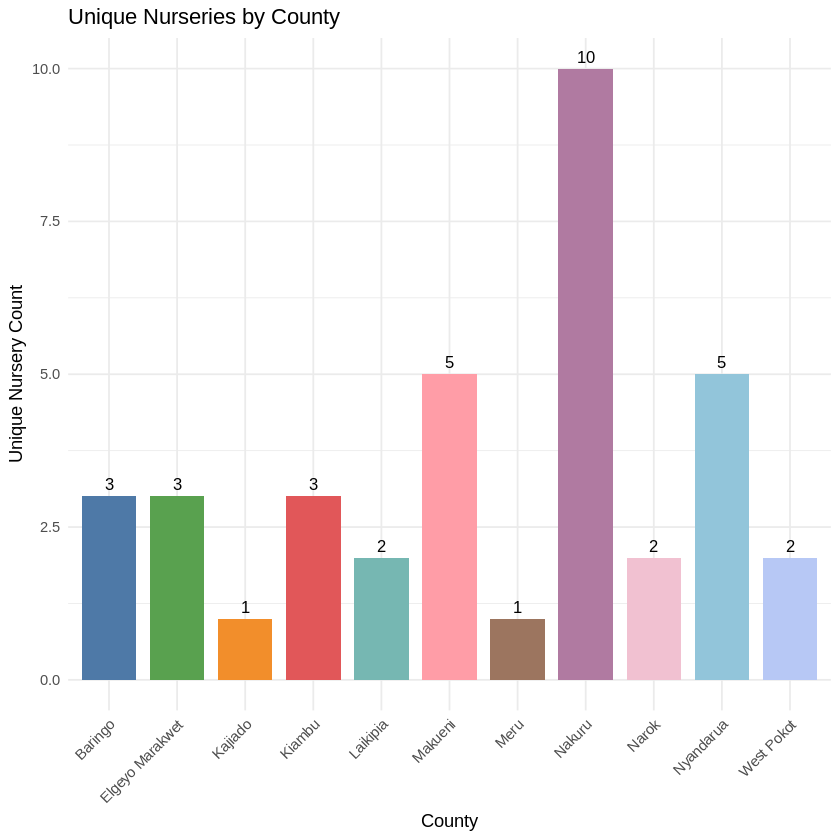

In [14]:
# Summarize data by counting unique nurseries (nursery_id) per county
pivot_table_nursery <- nursery_survey_data %>%
  group_by(ADM1) %>%
  summarize(count = n_distinct(nursery_id), .groups = "drop")  # Count unique nursery_id

# Custom colors for the plot
custom_colors <- c(
  "#4E79A7", "#59A14F", "#F28E2B", "#E15759", "#76B7B2",
  "#FF9DA7", "#9C755F", "#B07AA1", "#F1C1D1", "#92C5DA",
  "#B7C8F5"
)

# Create the bar chart
ggplot(pivot_table_nursery, aes(x = ADM1, y = count, fill = ADM1)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.8) +
  geom_text(
    aes(label = count),
    vjust = -0.5,  # Position the text slightly above the bar
    size = 3.5
  ) +
  scale_fill_manual(values = custom_colors) +  # Manually specify colors
  labs(
    title = "Unique Nurseries by County",
    x = "County",
    y = "Unique Nursery Count",
    fill = "County"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"  # Remove the legend
  )

Different Counties have more than one unique nurseries

## Nursery Purpose
## Pivot tables for grouping the Nurseries by Purpose for each counties

In [15]:
pivot_table_purpose <- nursery_survey_data %>%
  group_by(ADM1, nursery_purpose) %>%
  summarize(count = n(), .groups = "drop")  # Count the occurrences of each nursery purpose

# Pivot the data to make it wider (create a column for each nursery_purpose)
pivot_table_wide_purpose <- pivot_table_purpose %>%
  pivot_wider(
    names_from = nursery_purpose,  # Creates columns for each nursery_purpose
    values_from = count,           # The count of each purpose in each county
    values_fill = list(count = 0)  # Fill missing values with 0
  )

# View the pivot table
View(pivot_table_wide_purpose)

ADM1,income forest_mgt,income others,forest_mgt,forest_mgt others,income,income in_house_needs,forest_mgt in_house_needs,income forest_mgt in_house_needs,income forest_mgt others,income in_house_needs multipurpose
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Baringo,37,0,0,0,0,0,0,0,0,0
Elgeyo Marakwet,18,3,0,0,0,0,0,0,0,0
Kajiado,0,0,3,0,0,0,0,0,0,0
Kiambu,4,0,29,17,0,0,0,0,0,0
Laikipia,9,0,8,0,0,0,0,0,0,0
Makueni,10,5,0,0,4,16,0,0,0,0
Meru,13,0,0,0,0,0,0,0,0,0
Nakuru,36,0,0,0,28,0,30,6,21,11
Narok,30,0,0,0,0,0,0,0,0,0


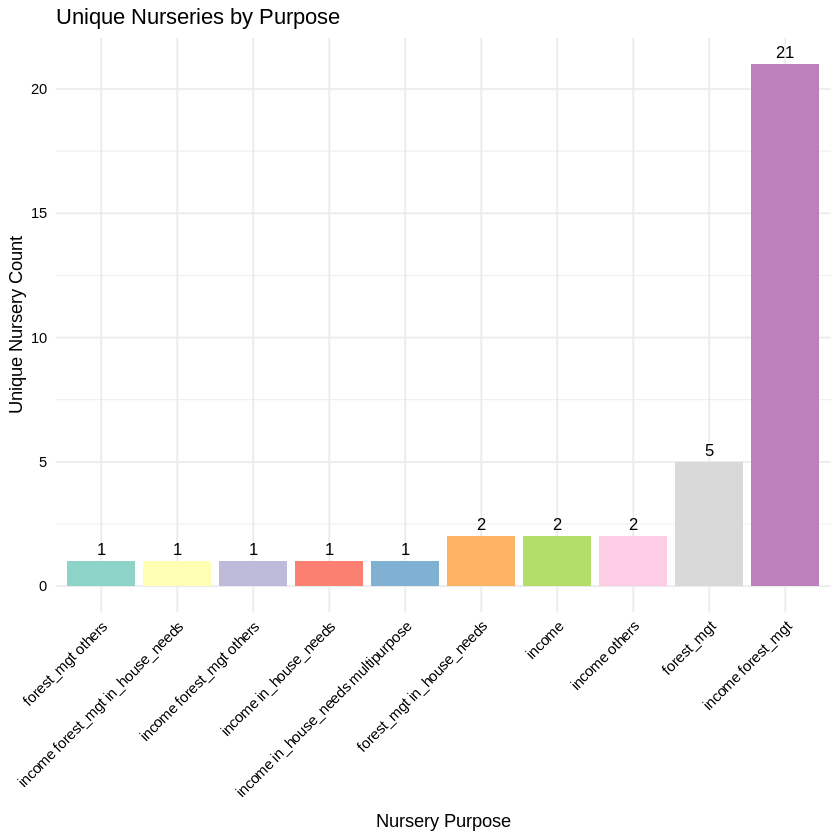

In [16]:
# Summarize data by counting unique nurseries (nursery_id) for each nursery purpose
purpose_count <- nursery_survey_data %>%
  group_by(nursery_purpose) %>%
  summarize(count = n_distinct(nursery_id), .groups = "drop")  # Count unique nursery_id

# Reorder nursery_purpose based on the count, from most to least frequent
purpose_count <- purpose_count %>%
  mutate(nursery_purpose = fct_reorder(nursery_purpose, count))

# Create a bar graph with ggplot2
ggplot(purpose_count, aes(x = nursery_purpose, y = count, fill = nursery_purpose)) +
  geom_bar(stat = "identity") +  # Create a bar graph
  geom_text(
    aes(label = count),  # Add the count on top of each bar
    vjust = -0.5,  # Position text slightly above the bar
    color = "black",
    size = 3.5
  ) +
  scale_fill_brewer(palette = "Set3") +  # Use a nice color palette
  labs(
    title = "Unique Nurseries by Purpose",
    x = "Nursery Purpose",
    y = "Unique Nursery Count"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black"),  # Maintain x-axis text
    axis.text.y = element_text(color = "black"),  # Black text for y-axis
    axis.title.y = element_text(color = "black"),  # Black title for y-axis
    legend.position = "none"  # Remove the legend
  )

From the analysis we can see that majority of the nurseries produce seeds for income forest management in-house needs while the least produce for income forest management in general not just their own in-house needs

# SEEDS ANALYSIS(INDIGENOUS & EXOTIC
## Total distict Seed Species Per Nursery in each county

In [17]:
# Summarize the data to get the number of unique nurseries and number of unique species per county
summary_table <- nursery_survey_data %>%
  group_by(ADM1) %>%
  summarize(
    unique_nurseries = n_distinct(nursery_id),  # Count the number of unique nurseries
    unique_species = n_distinct(species_name),  # Count the number of unique species
    .groups = "drop"  # Avoid nested groups
  )

# View the summary table
summary_table

ADM1,unique_nurseries,unique_species
<chr>,<int>,<int>
Baringo,3,26
Elgeyo Marakwet,3,16
Kajiado,1,3
Kiambu,3,41
Laikipia,2,15
Makueni,5,18
Meru,1,13
Nakuru,10,51
Narok,2,26


# NURSERY INFRASTUCTURE AND MATERIALS
## Nursery Infrasture Appropriateness Per County

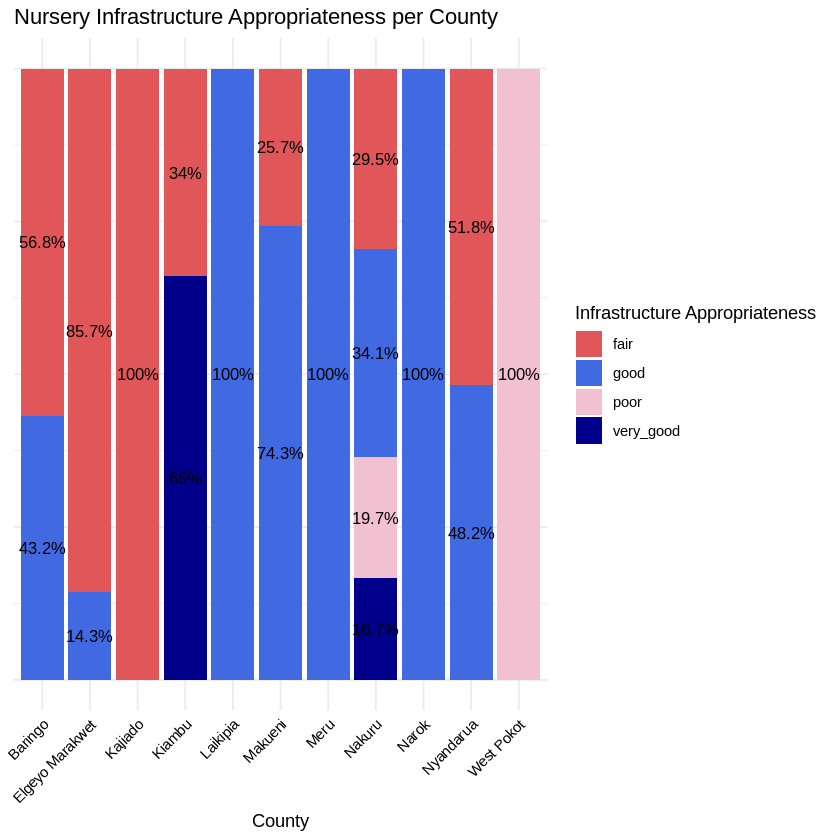

In [19]:
# Data preparation: Calculate percentages for nursery_infrastructure_appropriateness per county
infrastructure_data <- nursery_survey_data %>%
  filter(!is.na(Nursery_Infrastructure_Appropriateness)) %>%  # Remove NA values
  group_by(ADM1, Nursery_Infrastructure_Appropriateness) %>%
  summarize(count = n(), .groups = "drop") %>%  # Count responses for each category
  group_by(ADM1) %>%
  mutate(percentage = round(count / sum(count) * 100, 1))  # Calculate percentage for each category per county

# Define custom shades of blue for each infrastructure appropriateness level
blue_shades <- c("poor" = "#F1C1D1", "fair" = "#E15759", "good" = "#4169e1", "very_good" = "#00008B")

# Create the stacked bar chart with only percentages
ggplot(infrastructure_data, aes(x = ADM1, y = percentage, fill = Nursery_Infrastructure_Appropriateness)) +
  geom_bar(stat = "identity") +  # Default stacking for bars
  geom_text(
    aes(label = paste0(percentage, "%")),
    position = position_stack(vjust = 0.5),  # Position labels in the middle of the bars
    size = 3.5
  ) +  # Add percentage labels
  labs(
    title = "Nursery Infrastructure Appropriateness per County",
    x = "County",
    y = NULL,  # Remove y-axis label
    fill = "Infrastructure Appropriateness"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_blank(),  # Remove y-axis text
    axis.ticks.y = element_blank(),  # Remove y-axis ticks
    axis.title.y = element_blank(),  # Remove y-axis title
    axis.text.x = element_text(angle = 45, hjust = 1, color = "black")  # Rotate x-axis labels for readability
  ) +
  scale_fill_manual(values = blue_shades)  # Apply custom shades of blue

From the graph we discover that Kiambu County has the most very_good infrastructure appropriateness followed by Nakuru. Nakuru has a ratio of poor infrastructure whereas Kajiado and West-Pokot have complete fair and poor infrastructure. Laikipia, Meru and Narok have good infrastructures. The rest that is Baringo, Elgeyo Marakwet, Makueni and Nyandarua have a share of both good and fair infrastructures. Kiambu has a mix of both very good and fair while Nakuru seems to have signifacant ratios of all 4 categories

# Materials Satisfaction Per County

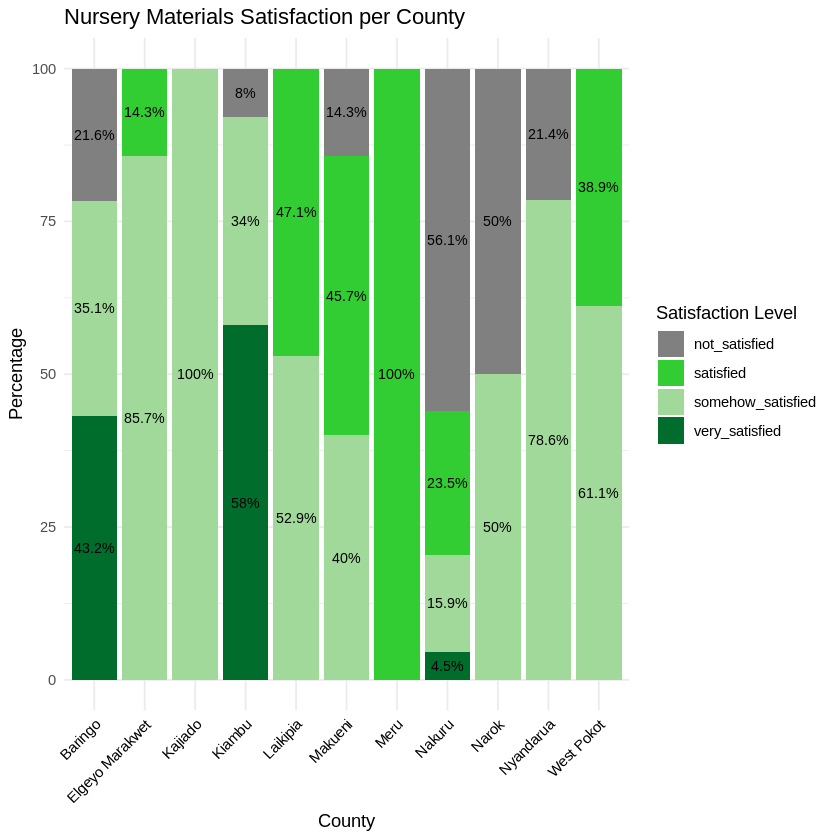

In [20]:
# Data preparation: Calculate percentage of responses per satisfaction level within each county
satisfaction_data <- nursery_survey_data %>%
  filter(!is.na(Nursery_Materials_Satisfaction)) %>%  # Remove NA values
  group_by(ADM1, Nursery_Materials_Satisfaction) %>%
  summarize(count = n(), .groups = "drop") %>%  # Count responses for each county and satisfaction level
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)  # Calculate percentage per county

# Define custom shades of green for each satisfaction level
green_shades <- c("not_satisfied" = "#808080",
                  "somehow_satisfied" = "#a1d99b",
                  "satisfied" = "#32CD32",
                  "very_satisfied" = "#006d2c")

# Create the stacked bar chart
ggplot(satisfaction_data, aes(x = ADM1, y = percentage, fill = Nursery_Materials_Satisfaction)) +
  geom_bar(stat = "identity") +  # Default stacking for bars
  geom_text(
    aes(label = paste0(round(percentage, 1), "%")),  # Format percentages with 1 decimal point
    position = position_stack(vjust = 0.5),  # Center labels within each bar segment
    size = 3, color = "black"  # black text for better visibility
  ) +
  labs(
    title = "Nursery Materials Satisfaction per County",
    x = "County",
    y = "Percentage",
    fill = "Satisfaction Level"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, color = "black")) +  # Rotate x-axis labels for readability
  scale_fill_manual(values = green_shades)  # Apply custom shades of green

From the bars, we can identify that Kiambu has a ratio of all satisfactions but the majority are unsatisfied with the nursery materials present. For the rest of the counties there is some level of satisfied apart from Kajiado, Narok and Nyandarua that incline more to somehow satisfied and not satisfied

# Finding the registration status and registering Organizations for each County
## Registration Status

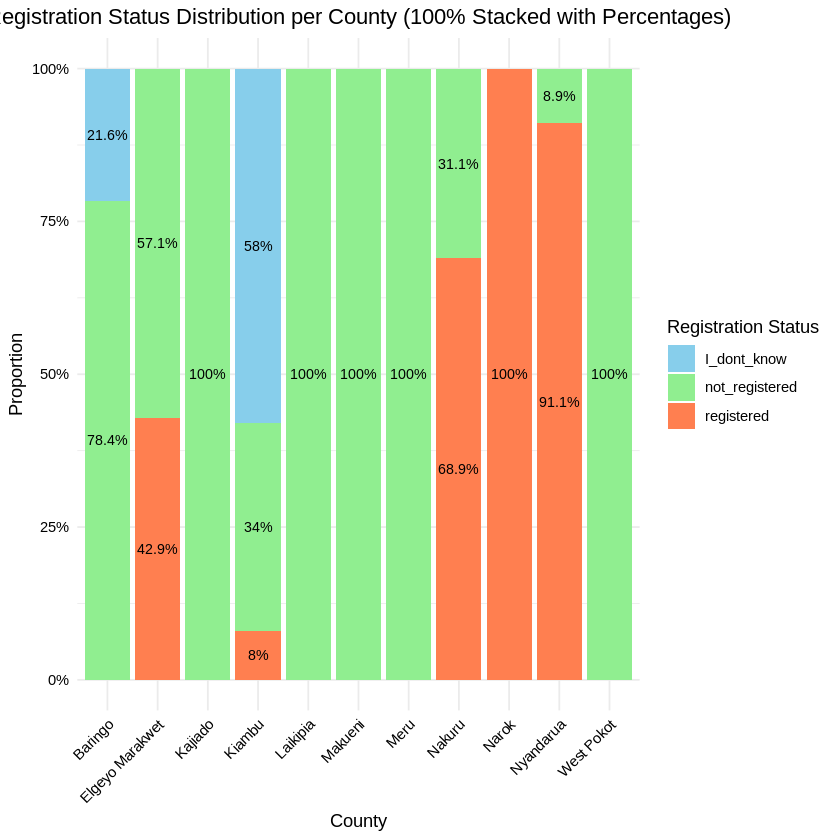

In [21]:
# Summarize and calculate proportions for registration status counts per county
pivot_table_reg_status <- nursery_survey_data %>%
  group_by(ADM1, nursery_registration_status) %>%
  summarise(count = n(), .groups = "drop") %>%
  complete(ADM1, nursery_registration_status, fill = list(count = 0)) %>%  # Fill missing with 0
  group_by(ADM1) %>%
  mutate(
    proportion = count / sum(count),  # Calculate proportions
    percentage = proportion * 100     # Calculate percentage for labeling
  )

# Create the 100% stacked bar chart with percentage labels, filtering out near-0% values
ggplot(pivot_table_reg_status, aes(x = ADM1, y = proportion, fill = nursery_registration_status)) +
  geom_bar(stat = "identity", position = "fill") +  # 100% stacked bar chart
  geom_text(
    aes(label = ifelse(percentage >= 1, paste0(round(percentage, 1), "%"), "")),  # Show labels for values >= 1%
    position = position_fill(vjust = 0.5), size = 3
  ) +
  labs(
    title = "Registration Status Distribution per County (100% Stacked with Percentages)",
    x = "County",
    y = "Proportion",
    fill = "Registration Status"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("skyblue", "lightgreen", "coral", "purple", "orange")) +  # Define colors
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, color="black"),  # Rotate county labels for readability
    plot.title = element_text(hjust = 0.5),
    axis.text.y = element_text(color = "black"),  # Black text for y-axis
    axis.title.x = element_text(color = "black"),  # Black title for x-axis
    axis.title.y = element_text(color = "black")   # Black title for y-axis
  ) +
  scale_y_continuous(labels = scales::percent)  # Show y-axis in percentage

## Registering Organization

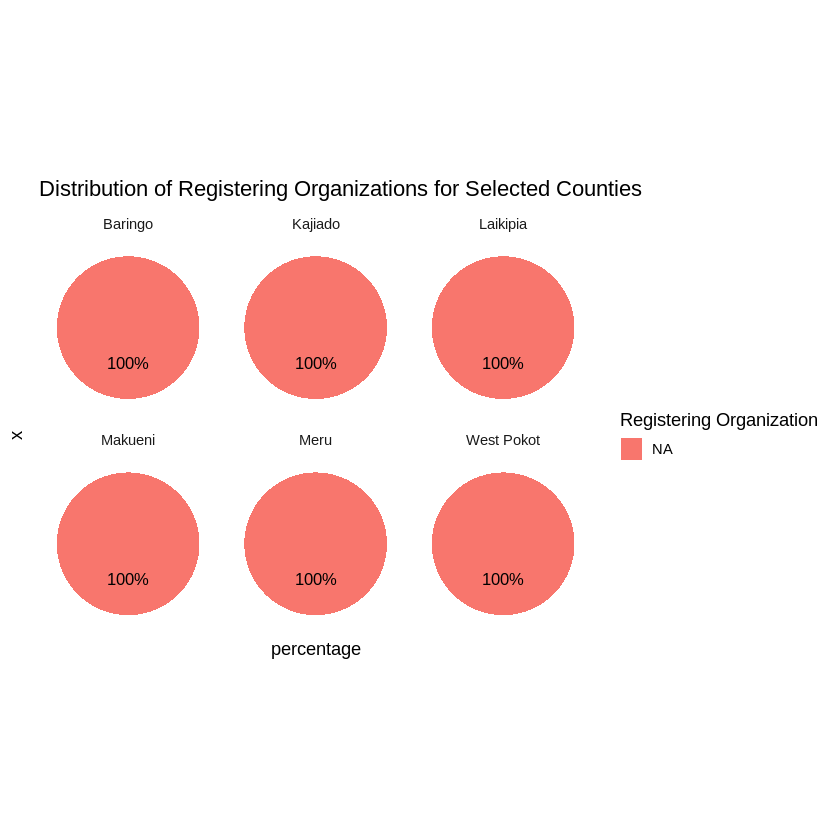

In [22]:
# Filter data for the selected counties
selected_counties <- c("Baringo", "Kajiado", "Laikipia", "Makueni", "Meru", "West Pokot")

registering_org_summary <- nursery_survey_data %>%
  mutate(registering_org = ifelse(is.na(registering_org), "NA", registering_org)) %>%  # Replace NA with "NA"
  filter(ADM1 %in% selected_counties) %>%  # Filter for selected counties
  group_by(ADM1, registering_org) %>%
  summarise(count = n(), .groups = "drop")

# Calculate percentages for each organization per county
registering_org_summary <- registering_org_summary %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(registering_org_summary, aes(x = "", y = percentage, fill = registering_org)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Registering Organizations for Selected Counties",
    fill = "Registering Organization"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

Nakuru stands out with a significantly higher number of registered organizations compared to the others, indicating a stronger presence of registered nurseries or a more active registration process in this region

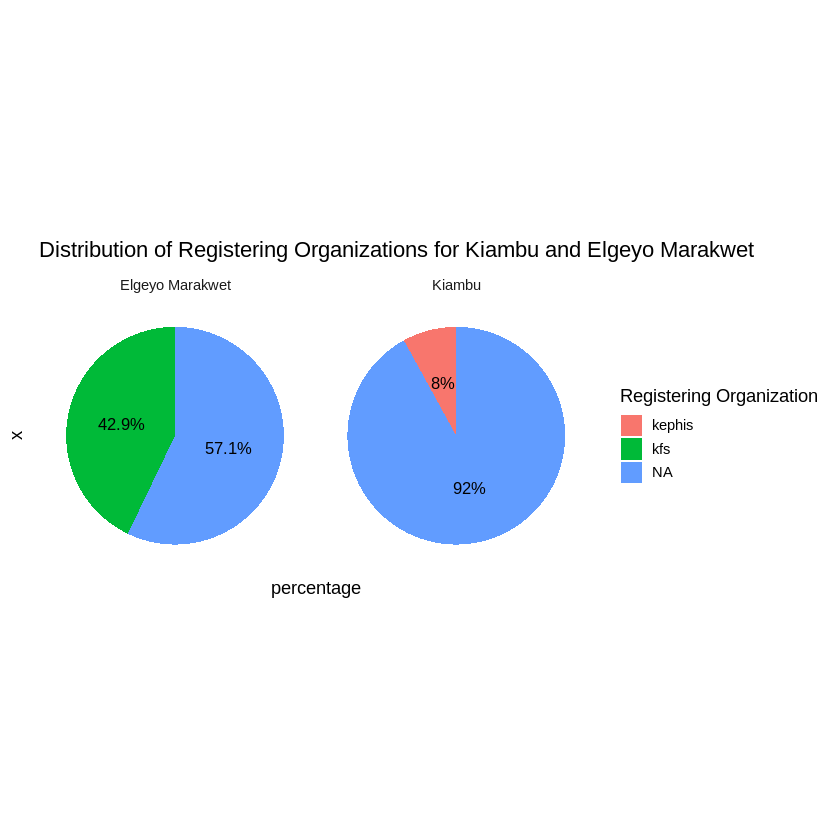

In [23]:
# Filter data for Kiambu and Elgeyo Marakwet
selected_counties <- c("Kiambu", "Elgeyo Marakwet")

registering_org_summary <- nursery_survey_data %>%
  mutate(registering_org = ifelse(is.na(registering_org), "NA", registering_org)) %>%  # Replace NA with "NA"
  filter(ADM1 %in% selected_counties) %>%  # Filter for selected counties
  group_by(ADM1, registering_org) %>%
  summarise(count = n(), .groups = "drop")

# Calculate percentages for each organization per county
registering_org_summary <- registering_org_summary %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(registering_org_summary, aes(x = "", y = percentage, fill = registering_org)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Registering Organizations for Kiambu and Elgeyo Marakwet",
    fill = "Registering Organization"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

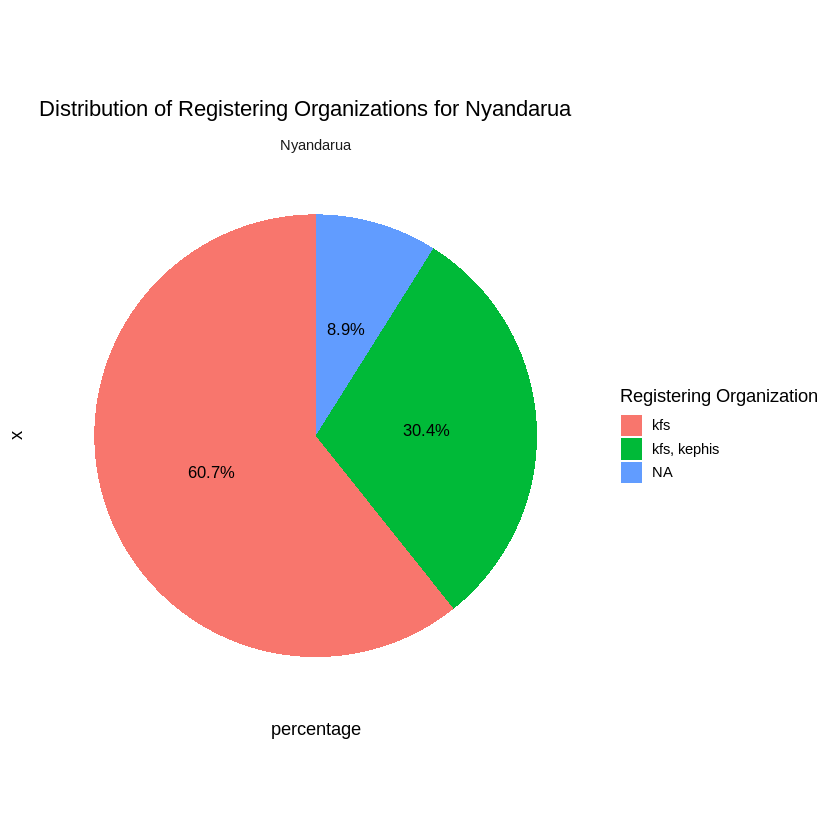

In [24]:
# Filter data for Nyandarua
selected_counties <- c("Nyandarua")

registering_org_summary <- nursery_survey_data %>%
  mutate(registering_org = ifelse(is.na(registering_org), "NA", registering_org)) %>%  # Replace NA with "NA"
  filter(ADM1 %in% selected_counties) %>%  # Filter for selected counties
  group_by(ADM1, registering_org) %>%
  summarise(count = n(), .groups = "drop")

# Calculate percentages for each organization per county
registering_org_summary <- registering_org_summary %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(registering_org_summary, aes(x = "", y = percentage, fill = registering_org)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Registering Organizations for Nyandarua",
    fill = "Registering Organization"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

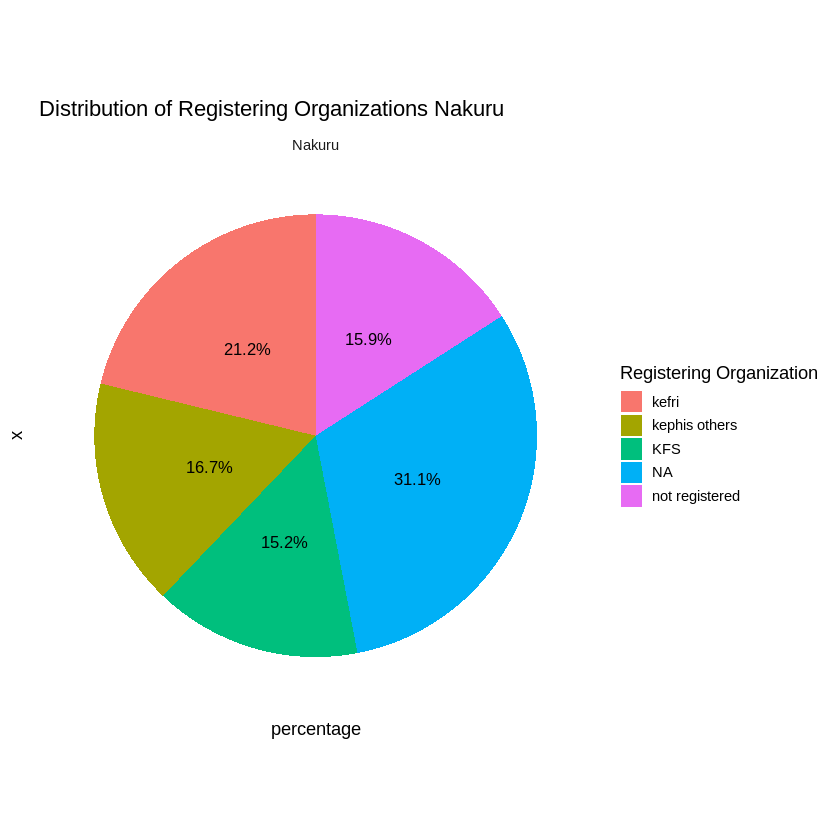

In [25]:
# Filter data for Nakuru
selected_counties <- c("Nakuru")

registering_org_summary <- nursery_survey_data %>%
  mutate(registering_org = ifelse(is.na(registering_org), "NA", registering_org)) %>%  # Replace NA with "NA"
  filter(ADM1 %in% selected_counties) %>%  # Filter for selected counties
  group_by(ADM1, registering_org) %>%
  summarise(count = n(), .groups = "drop")

# Calculate percentages for each organization per county
registering_org_summary <- registering_org_summary %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(registering_org_summary, aes(x = "", y = percentage, fill = registering_org)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Registering Organizations Nakuru",
    fill = "Registering Organization"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

# Analysing the Nursery Production Category per county
## Production Category Per County

In [26]:
# Create the pivot table: Count per nursery production category
pivot_table_nursery_production <- nursery_survey_data %>%
  group_by(ADM1, nursery_production_category) %>%
  count() %>%  # Count the occurrences of each category per county
  spread(key = nursery_production_category, value = n, fill = 0)  # Reshape to wide format

# View the pivot table
View(pivot_table_nursery_production)

ADM1,large,medium,small,very_large
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Baringo,29,8,0,0
Elgeyo Marakwet,0,21,0,0
Kajiado,0,3,0,0
Kiambu,0,21,0,29
Laikipia,0,0,17,0
Makueni,0,10,9,16
Meru,13,0,0,0
Nakuru,32,19,0,81
Narok,0,0,0,30


## Number of Seedlings available Per County

In [27]:
# Create a pivot table for the total number of seedlings per county and arrange in descending order
seedlings_count_per_county <- nursery_survey_data %>%
  group_by(ADM1) %>%  # Group by county
  summarize(total_seedlings = sum(number_of_seedlings, na.rm = TRUE), .groups = "drop") %>%  # Sum of seedlings per county
  arrange(desc(total_seedlings))  # Arrange in descending order

# View the pivot table
View(seedlings_count_per_county)

ADM1,total_seedlings
<chr>,<dbl>
Nyandarua,9504
Kiambu,5112
Nakuru,5100
Baringo,4725
Makueni,3527
West Pokot,3150
Elgeyo Marakwet,2670
Narok,2020
Meru,1070


## Method Of Propagation

In [28]:
pivot_method_of_propagation <- nursery_survey_data %>%
  group_by(ADM1, method_of_propagation) %>%
  summarise(
    count = n(),  # Count the occurrences of each method per county
    .groups = "drop"
  ) %>%
  pivot_wider(
    names_from = method_of_propagation,  # Spread methods as columns
    values_from = count,                # Values for each method
    values_fill = list(count = 0)       # Replace missing values with 0
  ) %>%
  mutate(
    total = `wildings` + `wildings and seeds` + `seeds` + `vegetative`  # Add a total column
  )

# View the resulting pivot table
print(pivot_method_of_propagation)

# A tibble: 11 × 7
   ADM1            seeds vegetative wildings `wildings and seeds`  `NA` total
   <chr>           <int>      <int>    <int>                <int> <int> <int>
 1 Baringo            20          4        9                    4     0    37
 2 Elgeyo Marakwet     7          0       14                    0     0    21
 3 Kajiado             3          0        0                    0     0     3
 4 Kiambu             14          7       16                   13     0    50
 5 Laikipia            4          1        3                    0     9     8
 6 Makueni            32          3        0                    0     0    35
 7 Meru                6          0        2                    5     0    13
 8 Nakuru             85         14       13                    5    15   117
 9 Narok              21          1        7                    1     0    30
10 Nyandarua          40          4       11                    0     1    55
11 West Pokot          4          0       14 

# Analysis of the Distance to Paved Road and Water
## Distance of the Nurseris to the Paved Road

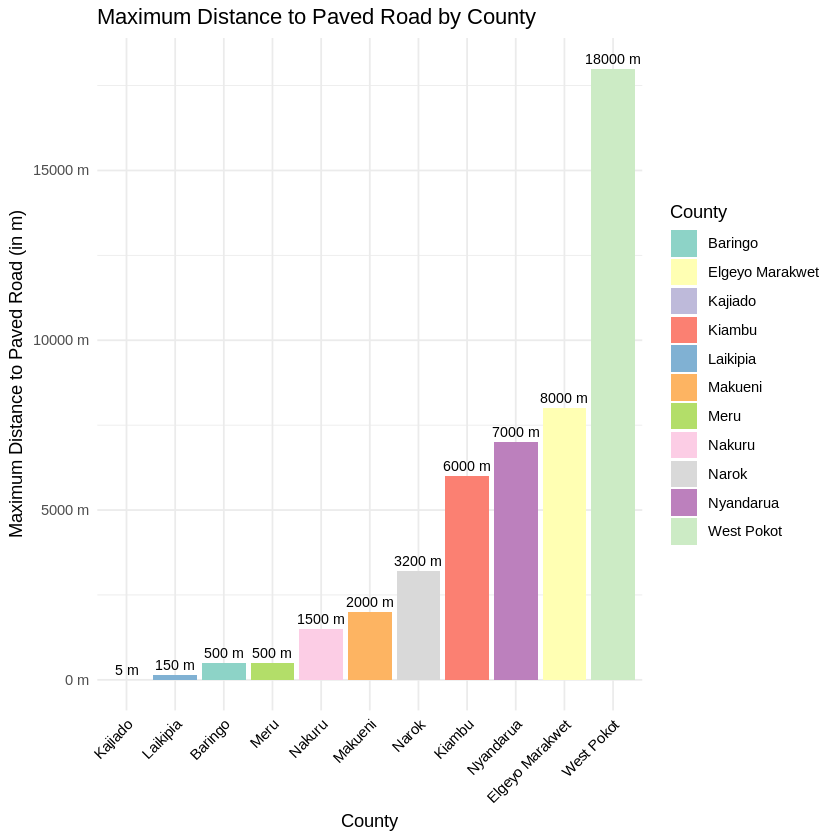

In [29]:
max_distance_per_county <- nursery_survey_data %>%
  group_by(ADM1) %>%
  summarise(max_distance = max(distance_to_paved_road, na.rm = TRUE), .groups = 'drop')

# Create the bar chart with the maximum distance and labels on top of each bar
ggplot(max_distance_per_county, aes(x = reorder(ADM1, max_distance),
                                    y = max_distance, fill = ADM1)) +
  geom_bar(stat = "identity", position = "dodge") +  # Bar chart with max distance per county
  labs(
    title = "Maximum Distance to Paved Road by County",
    x = "County",
    y = "Maximum Distance to Paved Road (in m)",
    fill = "County"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, color="black")) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set3") +  # Use a readable color palette for fill
  scale_y_continuous(labels = function(x) paste0(x, " m")) +  # Add "m" suffix to y-axis labels
  geom_text(aes(label = paste0(max_distance, " m")),  # Display the max distance on top of each bar
            vjust = -0.5,  # Adjust vertical position (above the bar)
            size = 3,  # Adjust text size
            color = "black")  # Text color

## Distance To Water

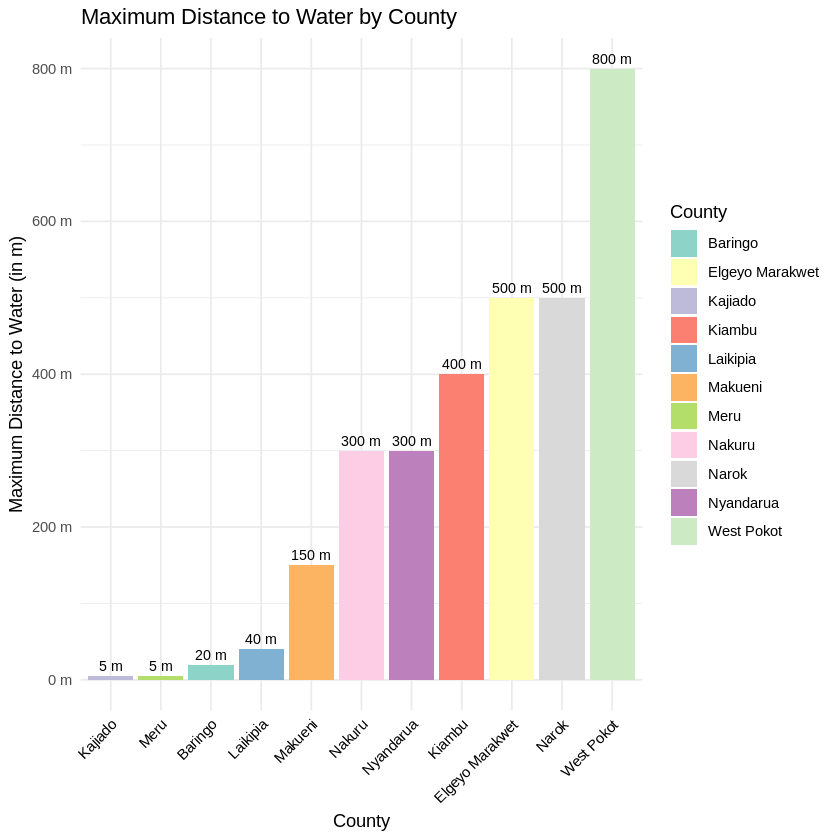

In [30]:
max_distance_to_water_per_county <- nursery_survey_data %>%
  group_by(ADM1) %>%
  summarise(max_distance_to_water = max(distance_to_water, na.rm = TRUE), .groups = 'drop')

# Create the bar chart with the maximum distance to water and labels on top of each bar
ggplot(max_distance_to_water_per_county, aes(x = reorder(ADM1, max_distance_to_water),
                                              y = max_distance_to_water, fill = ADM1)) +
  geom_bar(stat = "identity", position = "dodge") +  # Bar chart with max distance to water per county
  labs(
    title = "Maximum Distance to Water by County",
    x = "County",
    y = "Maximum Distance to Water (in m)",
    fill = "County"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, color ="black")) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set3") +  # Use a readable color palette for fill
  scale_y_continuous(labels = function(x) paste0(x, " m")) +  # Add "m" suffix to y-axis labels
  geom_text(aes(label = paste0(max_distance_to_water, " m")),  # Display the max distance to water on top of each bar
            vjust = -0.5,  # Adjust vertical position (above the bar)
            size = 3,  # Adjust text size
            color = "black")  # Text color

# ANALYSIS FOR EMPLOYEES
## Identifying the total number of employeers Per County

In [31]:
# Remove duplicates and summarize data per nursery in each county
pivot_table_nursery_employees <- nursery_survey_data %>%
  distinct(ADM1, nursery_id, nursery_total_employees, males_total, females_total) %>%  # Keep distinct combinations of County, Nursery, and Employee numbers
  group_by(ADM1, nursery_id) %>%  # Group by County and Nursery ID
  summarise(
    total_employees = sum(nursery_total_employees, na.rm = TRUE),
    total_male_employees = sum(males_total, na.rm = TRUE),
    total_female_employees = sum(females_total, na.rm = TRUE),
    .groups = "drop"  # Remove grouping after summarization
  )

# View the result
View(pivot_table_nursery_employees)



# Identifying total number of employees per county

# Remove duplicates and summarize data per county
pivot_table_nursery_employees <- nursery_survey_data %>%
  distinct(ADM1, nursery_id, nursery_total_employees, males_total, females_total) %>%  # Keep distinct combinations of County, Nursery, and Employee numbers
  group_by(ADM1) %>%  # Group by County only
  summarise(
    total_employees = sum(nursery_total_employees, na.rm = TRUE),
    total_male_employees = sum(males_total, na.rm = TRUE),
    total_female_employees = sum(females_total, na.rm = TRUE),
    .groups = "drop"  # Remove grouping after summarization
  )

# Add a "Total" row for the entire dataset
total_row <- pivot_table_nursery_employees %>%
  summarise(
    ADM1 = "Total",  # Label the row as "Total"
    total_employees = sum(total_employees, na.rm = TRUE),
    total_male_employees = sum(total_male_employees, na.rm = TRUE),
    total_female_employees = sum(total_female_employees, na.rm = TRUE)
  )

# Combine the original table with the total row
pivot_table_nursery_employees <- bind_rows(pivot_table_nursery_employees, total_row)

# View the result
View(pivot_table_nursery_employees)

ADM1,nursery_id,total_employees,total_male_employees,total_female_employees
<chr>,<int>,<dbl>,<dbl>,<dbl>
Baringo,7,7,4,3
Baringo,23,1,0,1
Baringo,32,15,8,7
Elgeyo Marakwet,3,1,0,1
Elgeyo Marakwet,9,21,12,9
Elgeyo Marakwet,19,2,1,1
Kajiado,28,1,1,0
Kiambu,16,16,10,6
Kiambu,21,2,1,1


ADM1,total_employees,total_male_employees,total_female_employees
<chr>,<dbl>,<dbl>,<dbl>
Baringo,23,12,11
Elgeyo Marakwet,24,13,11
Kajiado,1,1,0
Kiambu,20,13,7
Laikipia,1,1,0
Makueni,40,17,23
Meru,3,2,1
Nakuru,47,20,27
Narok,8,6,2


# Checking for Counties that Practise Nursery Technques for the different nurseries

In [32]:
# Create a pivot table for Nursery_Techniques per distinct nursery and county
pivot_table_nursery_techniques <- nursery_survey_data %>%
  distinct(ADM1, nursery_id, Nursery_Techniques) %>%  # Retain unique combinations of county, nursery, and techniques
  filter(!is.na(Nursery_Techniques)) %>%  # Remove NAs from Nursery_Techniques column
  group_by(ADM1, Nursery_Techniques) %>%  # Group by county and Nursery_Techniques (YES/NO)
  summarize(Count = n(), .groups = "drop") %>%  # Count occurrences
  pivot_wider(
    names_from = Nursery_Techniques,
    values_from = Count,
    values_fill = list(Count = 0)  # Replace missing values with 0
  )

# View the pivot table
print(pivot_table_nursery_techniques)

# A tibble: 11 × 3
   ADM1              yes    no
   <chr>           <int> <int>
 1 Baringo             3     0
 2 Elgeyo Marakwet     3     0
 3 Kajiado             0     1
 4 Kiambu              3     0
 5 Laikipia            2     0
 6 Makueni             5     0
 7 Meru                1     0
 8 Nakuru              9     1
 9 Narok               2     0
10 Nyandarua           4     1
11 West Pokot          2     0


It is evident that Kajiado County do not practice nursery techniques for the different species and also do not take part in the seed collection. All the rest take part in Nursery techniques apart from some but for some from 16 from Nakuru and 5 from Nyandarua.

Those who are not sales argue that they do not take part in Seed Sales because they cannot meet demands or are yet to make sales, they don't sale since their goal is restoration and conservation, They have partnered with KFS to plant in their forests and they support them in marketing the seedlings,they have the reliable project market from the ITF or their in-house market demand is very promising

# ANALYSING SELLERS
## Checking whether the sellers attended training offered

In [33]:
# Summarize data for distinct sellers and their training responses
pivot_table_training_attended <- nursery_survey_data %>%
  mutate(
    training_attended = ifelse(training_attended == "", NA, tolower(training_attended))  # Replace blanks with NA and convert to lowercase
  ) %>%
  distinct(ADM1, seller_name, training_attended) %>%  # Keep unique combinations
  group_by(ADM1, training_attended) %>%  # Group by county and training status
  summarize(count = n(), .groups = "drop") %>%  # Count occurrences
  pivot_wider(
    names_from = training_attended,
    values_from = count,
    values_fill = list(count = 0)
  ) %>%
  rowwise() %>%
  mutate(number_of_distinct_sellers = sum(c_across(-ADM1), na.rm = TRUE)) %>%  # Add total distinct sellers
  ungroup()

# View the pivot table
View(pivot_table_training_attended)

ADM1,no training,yes,NA,number_of_distinct_sellers
<chr>,<int>,<int>,<int>,<int>
Baringo,6,2,0,8
Elgeyo Marakwet,11,1,1,13
Kajiado,0,1,1,2
Kiambu,1,5,0,6
Laikipia,4,0,0,4
Makueni,7,7,0,14
Meru,2,0,0,2
Nakuru,11,10,4,25
Narok,0,2,0,2


## Analysis from the sellers whether the training was helpful for them in relation to the theme

In [34]:
training_theme_table <- nursery_survey_data %>%
  group_by(training_theme, ADM1, training_helpful) %>%  # Group by training theme, county (ADM1), and helpfulness
  summarize(count = n(), .groups = "drop")  # Count the occurrences without pivoting

# View the result
View(training_theme_table)

training_theme,ADM1,training_helpful,count
<chr>,<chr>,<chr>,<int>
General tree nursery practice and management,Elgeyo Marakwet,yes,1
Grafting and propagation of fruit trees,Nakuru,yes,1
"Nursery establishment and management, seed collection, sowing, pricking out",Makueni,yes,5
"Pest control I.. e Nematodes Dumping off, water management Melia propagation",Makueni,yes,4
Record keeping,Nakuru,yes,1
Seed collection and conservation,Nakuru,yes,11
Seed collection and processing,Nakuru,yes,1
Seed collection pests and diseases control,Nakuru,yes,1
"Seed collection, pests and diseases control and sales",Nakuru,yes,1



From the table we can see the themes were involved the training sessions, 21 received no training there were NA's from the data showing the training sessions were not availed as expected in all counties. Only 2 organizations provided the Training, that is, ICRAF and Green Belt Movement

# MARKET ANALYSIS
## Established Markets Per County

ADM1,yes,NA,no
<chr>,<int>,<int>,<int>
Baringo,2,1,0
Elgeyo Marakwet,0,1,2
Kajiado,0,1,0
Kiambu,3,1,0
Laikipia,2,0,0
Makueni,4,1,1
Meru,1,0,0
Nakuru,6,0,4
Narok,2,0,0


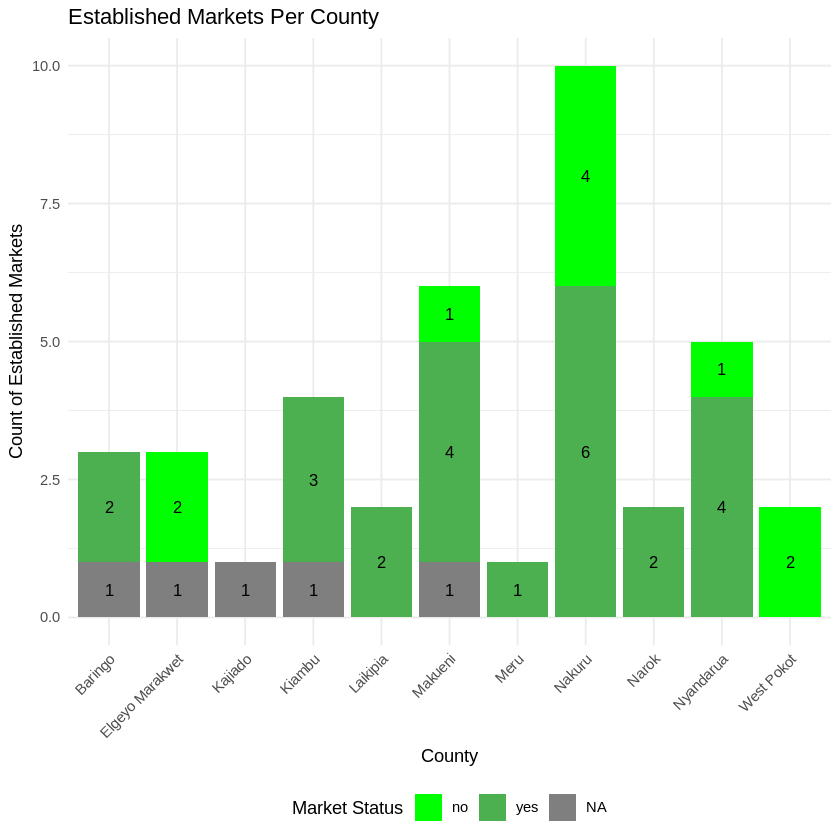

In [35]:
# Remove duplicate rows for each unique nursery per county
pivot_table_established_markets <- nursery_survey_data %>%
  distinct(ADM1, nursery_id, Established_Market) %>%  # Keep only unique combinations of county, nursery, and market status
  group_by(ADM1, Established_Market) %>%  # Group by county and market status
  summarize(count = n(), .groups = "drop") %>%  # Count occurrences
  pivot_wider(names_from = Established_Market, values_from = count, values_fill = list(count = 0))  # Pivot to wide format

# View the pivot table
View(pivot_table_established_markets)



# Remove duplicate rows and count distinct values for each Established_Market in each ADM1
pivot_table_established_markets <- nursery_survey_data %>%
  distinct(ADM1, nursery_id, Established_Market) %>%  # Keep unique combinations
  group_by(ADM1, Established_Market) %>%  # Group by county and market status
  summarize(count = n(), .groups = "drop")  # Count occurrences

# Create a stacked bar chart
ggplot(pivot_table_established_markets, aes(x = ADM1, y = count, fill = Established_Market)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bar chart
  geom_text(aes(label = count), position = position_stack(vjust = 0.5), size = 3.5) +  # Add count labels inside the bars
  labs(
    title = "Established Markets Per County",
    x = "County",
    y = "Count of Established Markets",
    fill = "Market Status"
  ) +
  scale_fill_manual(values = c("yes" = "#4CAF50", "no" = "green", "NA" = "#9E9E9E")) +  # Custom colors for responses
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom"  # Position the legend at the bottom
  )

# Established Markets per Nursery

## Identifying the main customers from Each of the Counties

In [37]:
# Clean up and standardize the 'Main_Customers' column
nursery_survey_data <- nursery_survey_data %>%
  mutate(Main_Customers = case_when(
    Main_Customers == "private_individuals in_house_needs" ~ "in_house_needs private_individuals",
    Main_Customers == "in_house_needs NGOs companies" ~ "in_house_needs NGOs and companies",
    Main_Customers == "NGOs government_planting_projects companies" ~ "NGOs and government_planting_projects companies",
    Main_Customers == "in_house_needs and companies" ~ "in_house_needs and companies",
    Main_Customers == "in_house_needs government_planting_projects" ~ "in_house_needs and government_planting_projects",
    Main_Customers == "private_individuals companies others" ~ "private_individuals and companies others",
    TRUE ~ Main_Customers  # Keep all other values unchanged
  ))

# Filter the relevant categories and summarize the counts and percentages by county
main_customers_summary <- nursery_survey_data %>%
  filter(Main_Customers %in% c("government_planting_projects",
                               "private_individuals",
                               "in_house_needs",
                               "NGOs",
                               "in_house_needs private_individuals",
                               "in_house_needs NGOs and companies",
                               "NGOs and government_planting_projects companies",
                               "in_house_needs and companies",
                               "in_house_needs and government_planting_projects",
                               "private_individuals and companies others")) %>%
  group_by(ADM1, Main_Customers) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(ADM1) %>%
  mutate(percentage = round(count / sum(count) * 100, 2))  # Calculate percentage per county and round to 2 decimals

# Pivot the data so that counties are columns and Main_Customers are rows
pivot_table <- main_customers_summary %>%
  select(ADM1, Main_Customers, percentage) %>%
  spread(key = ADM1, value = percentage, fill = 0)  # Pivoting, filling missing values with 0

# Display the pivot table with rounded percentages
pivot_table

Main_Customers,Baringo,Elgeyo Marakwet,Kiambu,Laikipia,Makueni,Meru,Nakuru,Narok,Nyandarua,West Pokot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
government_planting_projects,0.00,0,0,0,0.0,0,0.00,0,40.48,0
in_house_needs,21.62,0,58,100,0.0,0,14.29,0,0.00,0
in_house_needs and companies,0.00,0,34,0,0.0,0,0.00,0,0.00,0
in_house_needs and government_planting_projects,0.00,0,0,0,0.0,0,0.00,50,0.00,0
in_house_needs NGOs and companies,0.00,0,0,0,0.0,0,16.33,0,0.00,0
in_house_needs private_individuals,0.00,0,8,0,0.0,0,17.35,0,0.00,0
NGOs,0.00,100,0,0,62.5,100,26.53,0,30.95,100
NGOs and government_planting_projects companies,0.00,0,0,0,0.0,0,20.41,0,0.00,0
private_individuals,78.38,0,0,0,37.5,0,5.10,0,28.57,0


## Species Preferred Per County

In [38]:
# Calculate the count and percentage of preferred species per county
species_preferred_summary <- nursery_survey_data %>%
  group_by(ADM1, Species_Preferred) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(ADM1) %>%
  mutate(percentage = round(count / sum(count) * 100, 2))  # Calculate percentage within each county

# Pivot the data so that counties are columns and species preferred are rows
pivot_table <- species_preferred_summary %>%
  select(ADM1, Species_Preferred, percentage) %>%
  spread(key = ADM1, value = percentage, fill = 0)  # Pivoting, filling missing values with 0

# Display the pivot table
print(pivot_table)

# A tibble: 9 × 12
  Species_Preferred    Baringo `Elgeyo Marakwet` Kajiado Kiambu Laikipia Makueni
  <chr>                  <dbl>             <dbl>   <dbl>  <dbl>    <dbl>   <dbl>
1 exotic_species          21.6               0         0      0      0       0  
2 exotic_species frui…     0                 0         0      0      0      28.6
3 fruit_trees              0                 0         0      8     52.9    71.4
4 native_species           0                 0         0     58     47.1     0  
5 native_species exot…    35.1               0         0      0      0       0  
6 native_species exot…     0                 0         0      0      0       0  
7 native_species frui…    43.2               0         0     34      0       0  
8 Natives species          0                42.9       0      0      0       0  
9 NA                       0                57.1     100      0      0       0  
# ℹ 5 more variables: Meru <dbl>, Nakuru <dbl>, Narok <dbl>, Nyandarua <dbl>,
#   `West Po

## Marketing Medium

In [39]:
# Group and calculate percentages
marketing_medium_summary <- nursery_survey_data %>%
  group_by(ADM1, Marketing_Medium) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(ADM1) %>%
  mutate(percentage = round(count / sum(count) * 100, 2))  # Calculate percentages

# Pivot the data to make counties columns
pivot_table_clean <- marketing_medium_summary %>%
  select(Marketing_Medium, ADM1, percentage) %>%  # Select relevant columns
  pivot_wider(names_from = ADM1, values_from = percentage, values_fill = 0) %>%  # Pivot counties into columns
  arrange(Marketing_Medium)  # Arrange by Marketing_Medium for better readability

# Display the cleaned pivot table
View(pivot_table_clean)

Marketing_Medium,Baringo,Elgeyo Marakwet,Kajiado,Kiambu,Laikipia,Makueni,Meru,Nakuru,Narok,Nyandarua,West Pokot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
partnership_networks,0.00,0.00,0,100,0.00,28.57,100,26.52,0,30.36,100
partnership_networks agricultural_exhibitions,0.00,0.00,0,0,0.00,0.00,0,0.00,0,16.07,0
partnership_networks others,0.00,42.86,0,0,0.00,0.00,0,0.00,0,0.00,0
referrals,0.00,0.00,0,0,52.94,0.00,0,21.21,0,0.00,0
referrals social_media,0.00,0.00,0,0,0.00,45.71,0,0.00,0,0.00,0
referrals social_media agricultural_exhibitions,0.00,0.00,0,0,0.00,0.00,0,3.79,0,0.00,0
referrals social_media partnership_networks,0.00,0.00,0,0,0.00,0.00,0,0.00,50,0.00,0
referrals social_media partnership_networks agricultural_exhibitions,43.24,0.00,0,0,0.00,0.00,0,8.33,0,0.00,0
referrals_ partnership_networks,21.62,0.00,0,0,0.00,25.71,0,19.70,50,44.64,0


## Analysis of The Type of Constraints in the Market Place

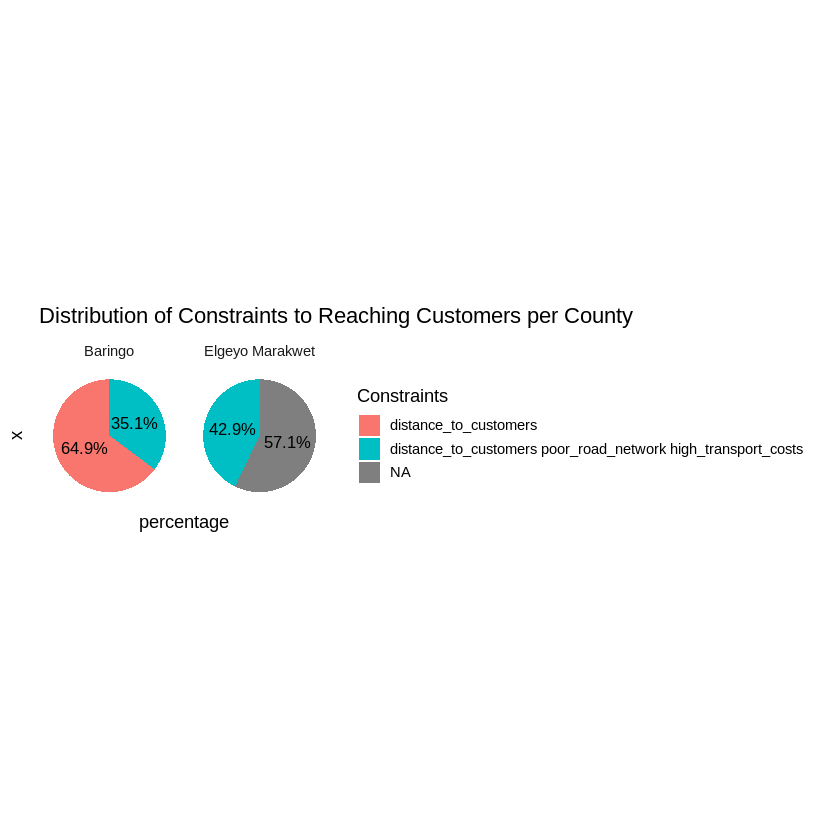

In [40]:
# Filter for the selected counties
selected_counties <- c("Baringo", "Elgeyo Marakwet")

constraints_summary_filtered <- nursery_survey_data %>%
  filter(ADM1 %in% selected_counties) %>%
  group_by(ADM1, Constraints_To_Reaching_Customers) %>%
  summarize(count = n(), .groups = "drop")

# Calculate the percentage for each constraint per county
constraints_summary_filtered <- constraints_summary_filtered %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(constraints_summary_filtered, aes(x = "", y = percentage, fill = Constraints_To_Reaching_Customers)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Constraints to Reaching Customers per County",
    fill = "Constraints"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

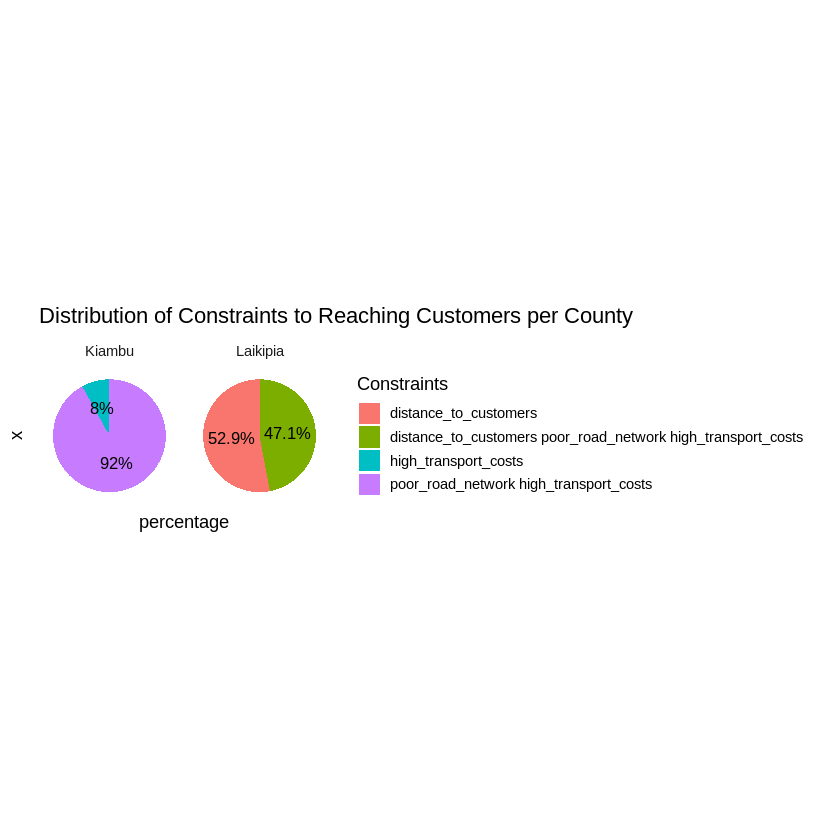

In [41]:
# Filter for the selected counties
selected_counties <- c("Laikipia", "Kiambu")

constraints_summary_filtered <- nursery_survey_data %>%
  filter(ADM1 %in% selected_counties) %>%
  group_by(ADM1, Constraints_To_Reaching_Customers) %>%
  summarize(count = n(), .groups = "drop")

# Calculate the percentage for each constraint per county
constraints_summary_filtered <- constraints_summary_filtered %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(constraints_summary_filtered, aes(x = "", y = percentage, fill = Constraints_To_Reaching_Customers)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Constraints to Reaching Customers per County",
    fill = "Constraints"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

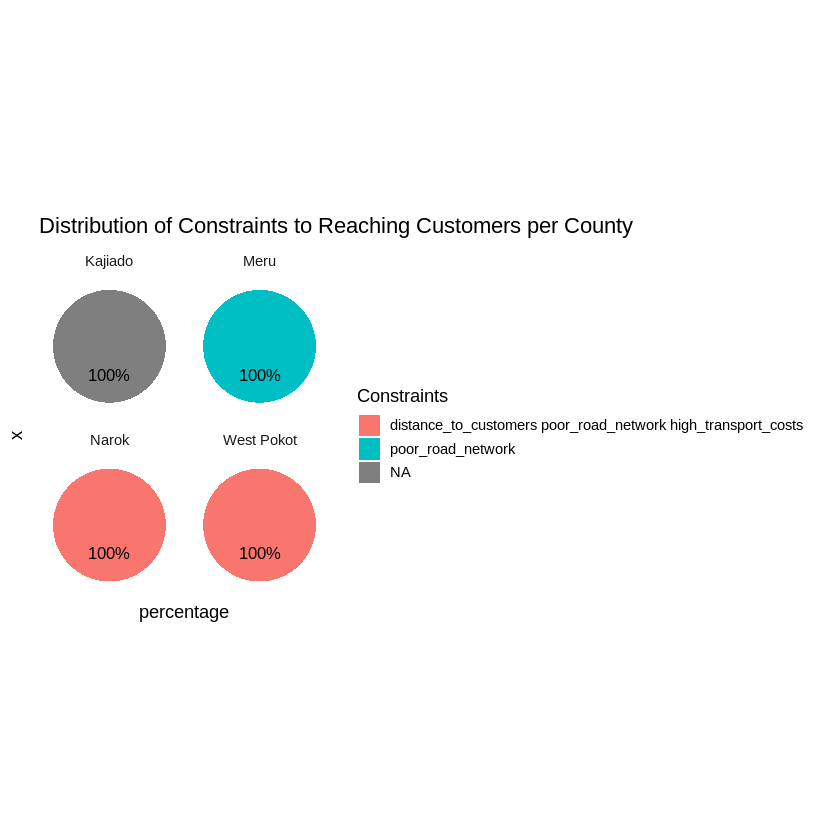

In [42]:
# Filter for the selected counties
selected_counties <- c("Narok", "West Pokot" , "Meru" , "Kajiado")

constraints_summary_filtered <- nursery_survey_data %>%
  filter(ADM1 %in% selected_counties) %>%
  group_by(ADM1, Constraints_To_Reaching_Customers) %>%
  summarize(count = n(), .groups = "drop")

# Calculate the percentage for each constraint per county
constraints_summary_filtered <- constraints_summary_filtered %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(constraints_summary_filtered, aes(x = "", y = percentage, fill = Constraints_To_Reaching_Customers)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Constraints to Reaching Customers per County",
    fill = "Constraints"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

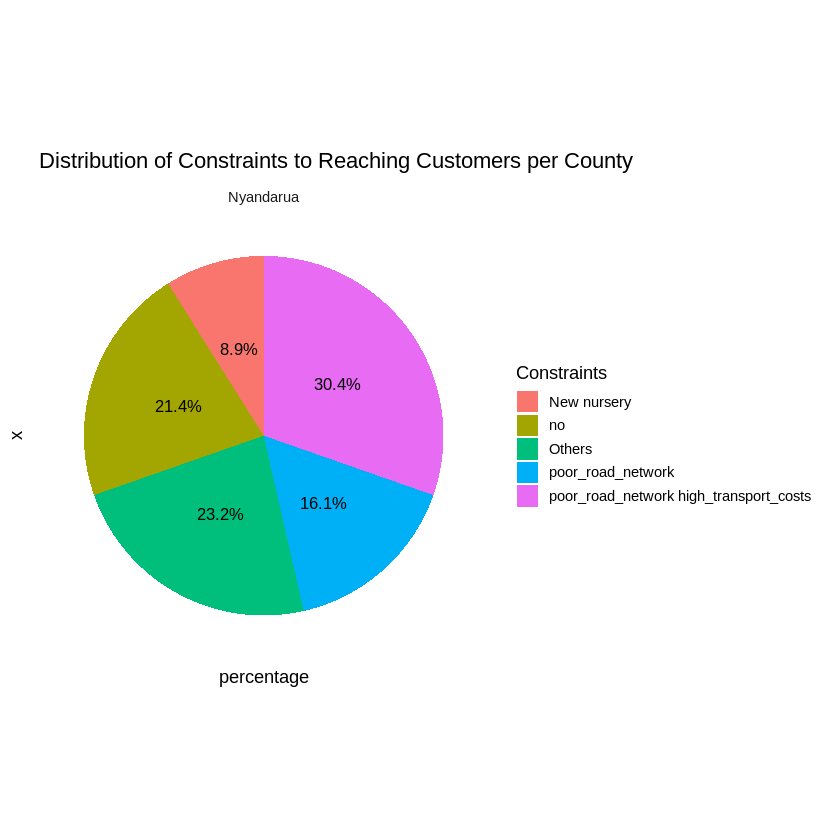

In [43]:
# Filter for the selected counties
selected_counties <- c("Nyandarua")

constraints_summary_filtered <- nursery_survey_data %>%
  filter(ADM1 %in% selected_counties) %>%
  group_by(ADM1, Constraints_To_Reaching_Customers) %>%
  summarize(count = n(), .groups = "drop")

# Calculate the percentage for each constraint per county
constraints_summary_filtered <- constraints_summary_filtered %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(constraints_summary_filtered, aes(x = "", y = percentage, fill = Constraints_To_Reaching_Customers)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Constraints to Reaching Customers per County",
    fill = "Constraints"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

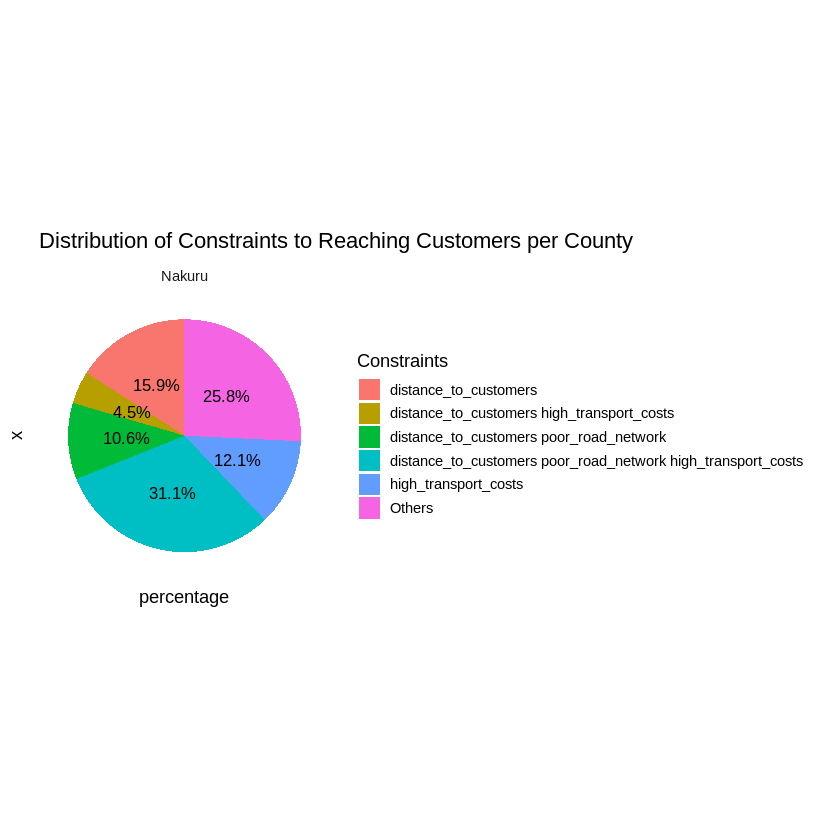

In [44]:
# Filter for the selected counties
selected_counties <- c("Nakuru")

constraints_summary_filtered <- nursery_survey_data %>%
  filter(ADM1 %in% selected_counties) %>%
  group_by(ADM1, Constraints_To_Reaching_Customers) %>%
  summarize(count = n(), .groups = "drop")

# Calculate the percentage for each constraint per county
constraints_summary_filtered <- constraints_summary_filtered %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(constraints_summary_filtered, aes(x = "", y = percentage, fill = Constraints_To_Reaching_Customers)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Constraints to Reaching Customers per County",
    fill = "Constraints"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

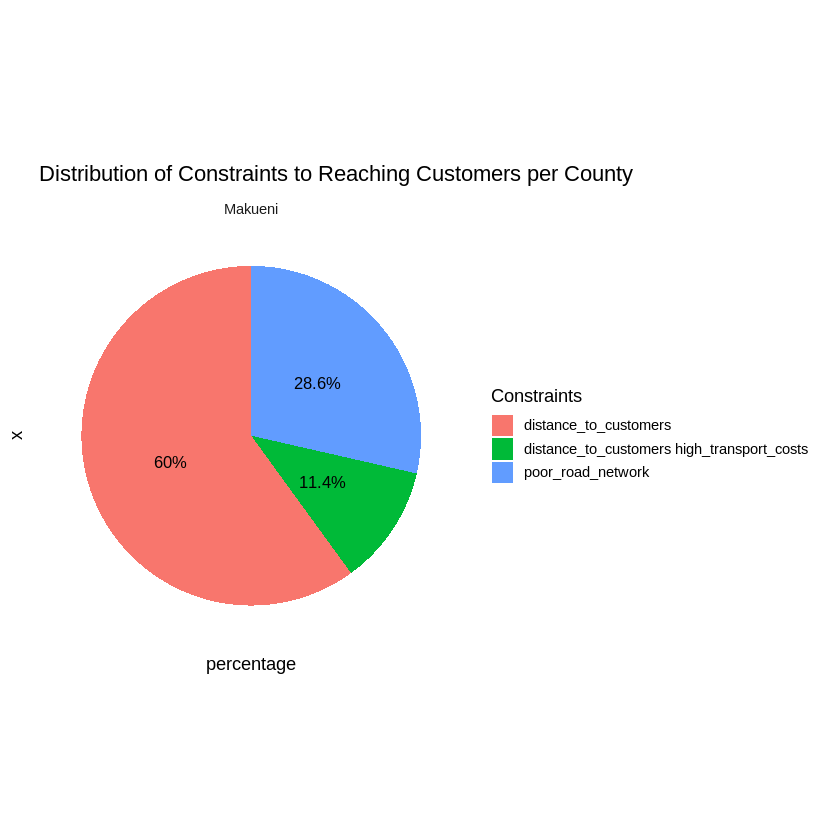

In [45]:
# Filter for the selected counties
selected_counties <- c("Makueni")

constraints_summary_filtered <- nursery_survey_data %>%
  filter(ADM1 %in% selected_counties) %>%
  group_by(ADM1, Constraints_To_Reaching_Customers) %>%
  summarize(count = n(), .groups = "drop")

# Calculate the percentage for each constraint per county
constraints_summary_filtered <- constraints_summary_filtered %>%
  group_by(ADM1) %>%
  mutate(percentage = count / sum(count) * 100)

# Plot pie charts with percentages on the slices and smaller legend color squares
ggplot(constraints_summary_filtered, aes(x = "", y = percentage, fill = Constraints_To_Reaching_Customers)) +
  geom_bar(stat = "identity", width = 1) +  # Create the bar chart
  coord_polar(theta = "y") +  # Convert to pie chart
  facet_wrap(~ ADM1) +  # Create a separate pie chart for each county
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 3.5) +  # Add percentage labels
  labs(
    title = "Distribution of Constraints to Reaching Customers per County",
    fill = "Constraints"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),  # Hide x-axis text
    axis.ticks = element_blank(),  # Remove axis ticks
    panel.grid = element_blank(),  # Remove grid lines
    legend.key.size = unit(0.5, "cm")  # Make the color squares smaller in the legend
  )

# NURSERY MANAGEMENT ANALYSIS

In [47]:
# Group and calculate percentages
mgt_info_summary <- nursery_survey_data %>%
  group_by(ADM1, nursery_mgt_information_source) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(ADM1) %>%
  mutate(percentage = round(count / sum(count) * 100, 2))

# Pivot the data so counties are columns and percentages are values
final_table_clean <- mgt_info_summary %>%
  select(ADM1, nursery_mgt_information_source, percentage) %>%
  pivot_wider(names_from = ADM1, values_from = percentage, values_fill = 0) %>%  # Pivot counties into columns
  arrange(nursery_mgt_information_source)  # Optional: arrange rows by information source

# Print the cleaned final table
View(final_table_clean)

nursery_mgt_information_source,Baringo,Elgeyo Marakwet,Kajiado,Kiambu,Laikipia,Makueni,Meru,Nakuru,Narok,Nyandarua,West Pokot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Others,0.00,14.29,0,0,0,0,0,19.70,0,0.00,0.00
field_days_&_exhibitions,0.00,0.00,0,0,0,0,0,4.55,0,0.00,0.00
field_days_&_exhibitions others,0.00,0.00,0,0,0,0,0,12.12,0,0.00,0.00
mass_media,0.00,42.86,0,0,0,0,0,4.55,0,0.00,0.00
mobile_phones,0.00,0.00,0,0,0,0,100,0.00,0,23.21,0.00
mobile_phones others,0.00,42.86,0,0,0,0,0,0.00,0,0.00,0.00
mobile_phones websites field_days_&_exhibitions mass_media,0.00,0.00,0,0,0,0,0,21.21,0,0.00,0.00
mobile_phones websites field_days_&_exhibitions others,0.00,0.00,0,0,0,0,0,0.00,0,30.36,0.00
mobile_phones websites others,43.24,0.00,0,0,0,0,0,0.00,0,0.00,0.00


## Competitors per County

In [48]:
# Summarize competitors_list by county
competitors_summary <- nursery_survey_data %>%
  group_by(ADM1, competitors_list) %>%
  summarize(count = n(), .groups = "drop") %>%
  spread(key = competitors_list, value = count, fill = 0)  # Pivot table format

# View the pivot table
View(competitors_summary)

ADM1,Community nurseries,Community_nurseries,Community_nurseries Government_nursery,Community_nurseries Private/individuals,Community_nurseries Private/individuals Government_nursery,Community_nurseries Private/individuals NGOs,Government nursery,Government_nursery,New nursery,NGOs,no,Private/individuals,<NA>
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Baringo,0,0,13,0,0,0,0,8,0,0,0,16,0
Elgeyo Marakwet,0,3,0,0,0,0,0,0,0,0,0,0,18
Kajiado,0,0,0,0,0,0,0,0,0,0,0,0,3
Kiambu,0,29,0,0,0,0,17,0,0,0,0,4,0
Laikipia,0,9,0,0,0,0,0,0,0,8,0,0,0
Makueni,0,0,0,0,0,0,0,5,0,0,0,30,0
Meru,0,0,0,13,0,0,0,0,0,0,0,0,0
Nakuru,0,21,0,32,0,6,0,14,0,0,0,59,0
Narok,15,0,0,0,0,0,0,0,0,0,0,15,0


# CHALLENGES
## Seed Collection Challenge

In [49]:
# Summarize Seed Collection Challenges per County
seed_collection_challenges_summary <- nursery_survey_data %>%
  group_by(ADM1, Seed_Collection_Challenge_description) %>%  # Group by County and Challenge
  summarize(count = n(), .groups = "drop") %>%  # Count occurrences
  arrange(ADM1, desc(count))  # Sort by County and descending count

# View the Summary Table
seed_collection_challenges_summary

ADM1,Seed_Collection_Challenge_description,count
<chr>,<chr>,<int>
Baringo,"Olea we source from the ground not good seed, podocarpus and olea from Kefri did not germinate. Bamboo is endangered species we would like to have it. Survival rate is very low. Seed is expensive,at 5000 and germination is poor",16
Baringo,"Getting enough seeds is difficult for some species like Grevillea robusta. We lack propagation knowledge of some species like Warburgia ugandensis, podocarpus falcatus and Juniperus procera.",13
Baringo,Longer period in search of seeds from local dealers. Very poor germination levels for some species like Juniperus procera. Other species are hard to get like Warburgia ugandensis.,8
Elgeyo Marakwet,Hard to get good seed sources for enough seeds sourcing. Low survival rates for the wildings. Hard to get seeds for some priority tree species. Poor terrain and long distances make seed collection difficult. We need materials (seeds) and training support,9
Elgeyo Marakwet,"Seed pretreatment, timing of seeding season, procedure or handling wildlings, long walking distance and storage problems.",9
Elgeyo Marakwet,"Only able to get few quantities than expected, poor quality seeds sometimes affected by diseases",3
Kajiado,Don't collect seed. Intent to buy from KEFRI,3
Kiambu,Seasons variation. Most trees did not flower this year. Wildings are regulated by KFS to allow normal natural regeneration. This is common for difficult to regenerate species like Polyscias fulva. no problem in collection and handling. We have seedbank to,28
Kiambu,"limited knowledge on tree phenology, differentiating male from female in dioecious plants like Podo spp, some species not available for seed collection like Vitex keniensinsis and seed dormancy to most native species.",17


## Seed Sale Challenge

In [50]:
# Summarize Seed Collection Challenges per County
seed_sale_challenges_summary <- nursery_survey_data %>%
  group_by(ADM1, Seed_Sales_Challenges_description ) %>%  # Group by County and Challenge
  summarize(count = n(), .groups = "drop") %>%  # Count occurrences
  arrange(ADM1, desc(count))  # Sort by County and descending count

# View the Summary Table
seed_sale_challenges_summary

ADM1,Seed_Sales_Challenges_description,count
<chr>,<chr>,<int>
Baringo,"Low demand for indigenous tree species, limited range of fruit trees in the nursery to diversify our production and sales",16
Baringo,"Lack of market for seedlings, payment challenges especially if we deliver prior to payment",13
Baringo,Low market for indigenous species like Juniperus procera that is overgrowing in the nursery. Dishonest customers who fail to complete payment and also return our crates used to package the seedlings. no establishment of marketing strategy. no sign post for directing customers,8
Elgeyo Marakwet,Limited market for the seedlings beyond project market. Need training on marketing for seedlings and collection of the wildlings in the forest,9
Elgeyo Marakwet,"no market except for the project one. Need support in nursery information, marketing and networking.",9
Elgeyo Marakwet,Yet to make any sales,3
Kajiado,not yet to sale,3
Kiambu,We don't sale. Our goal is restoration and consevation.,29
Kiambu,"Native tree species have low market preference in the sorrounding community, Site species matching challenge for specific trees in market demand like avocado",17


# Training Areas Required

In [51]:
# Summarize the data by county and training areas required
training_summary <- nursery_survey_data %>%
  group_by(ADM1, training_areas_required) %>%
  summarize(count = n(), .groups = "drop")

# Pivot the table to make counties the columns and training areas as rows
pivot_table <- training_summary %>%
  spread(key = ADM1, value = count, fill = 0)  # Pivot counties as columns

# Display the pivot table
View(pivot_table)

training_areas_required,Baringo,Elgeyo Marakwet,Kajiado,Kiambu,Laikipia,Makueni,Meru,Nakuru,Narok,Nyandarua,West Pokot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Record_keeping,0,0,0,0,9,0,0,0,0,0,0
Record_keeping Sales_and_marketing,0,0,0,0,0,5,0,0,0,22,11
Record_keeping Sales_and_marketing Business_plan_development,0,0,0,0,8,0,0,0,15,0,0
Record_keeping Sales_and_marketing Business_plan_development others,0,0,0,0,0,0,0,0,0,5,0
Record_keeping Sales_and_marketing others,0,0,0,0,0,16,13,0,0,0,7
risk_assessment,0,0,0,29,0,0,0,0,0,0,0
risk_assessment others,0,0,0,0,0,0,0,0,0,17,0
risk_assessment Record_keeping Sales_and_marketing Business_plan_development,37,12,0,4,0,10,0,90,0,12,0
risk_assessment Record_keeping Sales_and_marketing Business_plan_development others,0,9,0,17,0,4,0,36,15,0,0
